In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt
import regex
import tensorflow as tf
import nltk
from nltk.probability import FreqDist
import neattext.functions as nfx #Text cleaning


In [2]:
#reading data
df = pd.read_csv("flat_file.csv")
df.head()

,txt,cnt,label,aggression_attack,kaggle,toxicity,twitter,twitter_racism,twitter_sexism,youtube,train_kaggle2
0,NaN,2,NaN,0,0,0,0,0,0,0,0
1,,4,0.0,1,0,1,0,0,0,0,0
2,,1,0.0,1,0,0,0,0,0,0,0
3,,1,0.0,1,0,0,0,0,0,0,0
4,...,1,0.0,0,0,1,0,0,0,0,0


In [3]:
df.shape

(379181, 11)

In [4]:
#check for duplicated rows
df.duplicated().sum()

0

In [5]:
#missing values analysis
df.isna().sum()

txt                  1
cnt                  0
label                3
aggression_attack    0
kaggle               0
toxicity             0
twitter              0
twitter_racism       0
twitter_sexism       0
youtube              0
train_kaggle2        0
dtype: int64

## Preprocessing & EDA

### Now I want to create bag of words and words cloud for bullying comments only

In [3]:
#droping lines with NA (<1%) to be able to clean the text
df = df.dropna()

In [4]:
# Convert all messages to lower case
df['txt_clean'] = df['txt'].str.lower()

In [5]:
#should've translated emojis instead of plain replacing!?

df['txt_clean'] = df['txt_clean'].apply(nfx.remove_emojis)
df['txt_clean'] = df['txt_clean'].apply(nfx.remove_currency_symbols)
df['txt_clean'] = df['txt_clean'].apply(nfx.remove_emails)
df['txt_clean'] = df['txt_clean'].apply(nfx.remove_phone_numbers)
df['txt_clean'] = df['txt_clean'].apply(nfx.remove_dates)
df['txt_clean'] = df['txt_clean'].apply(nfx.remove_urls)


In [6]:
df['txt_clean'] = df['txt_clean'].apply(nfx.remove_puncts, most_common = False)
df['txt_clean'] = df['txt_clean'].apply(nfx.remove_multiple_spaces)
df['txt_clean'] = df['txt_clean'].apply(nfx.remove_stopwords)
df['txt_clean'] = df['txt_clean'].apply(nfx.remove_custom_pattern, term_pattern = (r'err:*'))
df['txt_clean'] = df['txt_clean'].apply(nfx.remove_numbers)
                                        
#df['txt_clean'] = df['txt_clean'].apply(nfx.remove_custom_words, custom_wordlist = (""))

In [7]:
#delete unmeaningful text; drop null -- should I use it after deleting punctuation
df['txt_clean'] = df['txt_clean'].str.strip()
df = df.loc[df['txt_clean'] != '']

In [11]:
df[['txt', 'txt_clean']]

,txt,txt_clean
5,...,bot seriously driving crazy image exists kill
6,...,unbloc
7,...,unblockyour reason
8,...,sock puppet good dont confused thanks genious ...
9,...,glen love fag
...,...,...
379175,Sensual Pleasures of the MindItalic text\n\nTh...,sensual pleasures minditalic text endless crea...
379176,Sensual Pleasures of the MindItalic text The...,sensual pleasures minditalic text endless crea...
379177,😂 “@benpobjie: “There is a secret element that...,“benpobjie “there secret element we’ve decided...
379178,😂😂😂 shame @ kat &amp; andre #MKR,shame kat amp andre mkr


In [8]:
df_b = df.loc[df['label']==1,:]
df_b.head()

,txt,cnt,label,aggression_attack,kaggle,toxicity,twitter,twitter_racism,twitter_sexism,youtube,train_kaggle2,txt_clean
5,...,2,1.0,1,0,1,0,0,0,0,0,bot seriously driving crazy image exists kill
9,...,2,1.0,1,0,1,0,0,0,0,0,glen love fag
17,...,2,1.0,1,0,1,0,0,0,0,0,hello cow head
27,...,2,1.0,1,0,1,0,0,0,0,0,dude stop complanin thing hapens dah page dont...
28,...,2,1.0,1,0,1,0,0,0,0,0,hello gay welcome site gilliam murder puppies ...


In [9]:
#concat all toxic comments into text
text_b = df_b['txt_clean'].str.cat(sep=' ')
print(text_b[:1000])

bot seriously driving crazy image exists kill glen love fag hello cow head dude stop complanin thing hapens dah page dont u hav better u pansy hello gay welcome site gilliam murder puppies cccc cccc wow lol restore question sign  know cars life seen stupid motherfucker kiss american soil goodbye commie youre blocked  days shushing cow hate soooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo likes ketchup little boys penises bite licked ur mum suk fuck ur self cares avout celebrities guys girlswant tits yourmom dont let post fuck fake dumb nuts point youve smoked tard suck encyclopedia nerdskanichiwa bitches think doo doo yes doo doo youre administrator faggot nb wannabe stop idiot actually look link provided look p statistics undeniably correct according official government statistics confused difference urban area metropolitan area fucking germanian piece shit stop vandalizing page joking rumours militant embittered pedophile faggot conspiracy wikipedia true ass doubly demil

In [10]:
#concat all comments into text
text = df['txt_clean'].str.cat(sep=' ')
print(text[:1000])

bot seriously driving crazy image exists kill unbloc unblockyour reason sock puppet good dont confused thanks genious wikipedias editing glen love fag happy new year nufy happy new year nufy happy new year nufy happy new year nufy happy new year nufy newli happy new year nufy happy new year nufy n au unblockyo isaac im sorry said asked u talk mom u u dont reply wont talk school weekend  im leaving time ill talk friday night afternoon later rosborne usermiszabotconfig archiveheader maxarchivesize kn happy holdiays winter happy new year hello cow head oh  jams boondes true shut watch dont ya bakutrix believe fact shaft article adressed mayir school bulldowzed create minimall wernt shaft youll regret words dids someday day deportation comeback neverguesswhathappened ©danielaustin author look sir sorry choose believe typed mess choose believe reverted mess tiresome cant change thoughts work office lot computers honest dont understand address talking know type mess revert mess respect admin

In [11]:
len(text)

87066205

### Word tokenize

In [12]:
from nltk.tokenize import word_tokenize

In [36]:
tokenized_word=word_tokenize(text)

In [30]:
print(tokenized_word[:20])

['bot', 'seriously', 'driving', 'crazy', 'image', 'exists', 'kill', 'unbloc', 'unblockyour', 'reason', 'sock', 'puppet', 'good', 'dont', 'confused', 'thanks', 'genious', 'wikipedias', 'editing', 'glen']


In [37]:
tokenized_word_b=word_tokenize(text_b)

In [38]:
#filtered_sent[0:30]
fdist = FreqDist(tokenized_word_b)
print(fdist)

<FreqDist with 59808 samples and 1162679 outcomes>


In [39]:
fdist.most_common(30)

[('fuck', 25319),
 ('shit', 10927),
 ('like', 10218),
 ('nigger', 9784),
 ('dont', 9525),
 ('suck', 9168),
 ('hate', 8733),
 ('ass', 8476),
 ('wikipedia', 8084),
 ('faggot', 7496),
 ('u', 7495),
 ('fucking', 7482),
 ('fat', 6894),
 ('know', 6538),
 ('im', 6166),
 ('die', 6013),
 ('gay', 5911),
 ('page', 5657),
 ('people', 5320),
 ('jew', 5193),
 ('youre', 4806),
 ('penis', 4456),
 ('cunt', 4239),
 ('dick', 4087),
 ('think', 3783),
 ('article', 3754),
 ('stop', 3706),
 ('sucks', 3590),
 ('moron', 3506),
 ('stupid', 3498)]

### Lemmatization
stemming was too agressive

In [40]:
from nltk.stem.wordnet import WordNetLemmatizer

In [41]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sofnl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
lem = WordNetLemmatizer()

lemmatized_words=[]
for w in tokenized_word:
    lemmatized_words.append(lem.lemmatize(w))


In [43]:
fdist = FreqDist(lemmatized_words)
fdist.most_common(30)

[('article', 168025),
 ('page', 128339),
 ('wikipedia', 80820),
 ('like', 71795),
 ('dont', 61868),
 ('talk', 56836),
 ('think', 50258),
 ('source', 49146),
 ('know', 48476),
 ('im', 48279),
 ('people', 45483),
 ('time', 44795),
 ('edit', 39875),
 ('use', 38476),
 ('need', 33373),
 ('thanks', 32503),
 ('good', 31425),
 ('link', 30968),
 ('want', 30469),
 ('user', 30234),
 ('way', 28920),
 ('image', 27975),
 ('information', 27792),
 ('comment', 27511),
 ('fuck', 27118),
 ('thing', 26691),
 ('section', 26605),
 ('editor', 26146),
 ('help', 26015),
 ('look', 25994)]

### Bag-of-Words

In [44]:
from collections import Counter

In [45]:
bow = Counter(tokenized_word_b)
bow.most_common(50)

[('fuck', 25319),
 ('shit', 10927),
 ('like', 10218),
 ('nigger', 9784),
 ('dont', 9525),
 ('suck', 9168),
 ('hate', 8733),
 ('ass', 8476),
 ('wikipedia', 8084),
 ('faggot', 7496),
 ('u', 7495),
 ('fucking', 7482),
 ('fat', 6894),
 ('know', 6538),
 ('im', 6166),
 ('die', 6013),
 ('gay', 5911),
 ('page', 5657),
 ('people', 5320),
 ('jew', 5193),
 ('youre', 4806),
 ('penis', 4456),
 ('cunt', 4239),
 ('dick', 4087),
 ('think', 3783),
 ('article', 3754),
 ('stop', 3706),
 ('sucks', 3590),
 ('moron', 3506),
 ('stupid', 3498),
 ('bitch', 3391),
 ('want', 3349),
 ('fag', 3306),
 ('talk', 3261),
 ('going', 3184),
 ('dickhead', 3171),
 ('wiki', 3169),
 ('time', 3146),
 ('nipple', 3081),
 ('cant', 2971),
 ('block', 2907),
 ('bullshit', 2834),
 ('wanker', 2789),
 ('life', 2769),
 ('right', 2760),
 ('pig', 2752),
 ('hi', 2742),
 ('cock', 2738),
 ('faggots', 2618),
 ('kill', 2502)]

In [46]:
lst1 = pd.DataFrame({bow.values()},columns=bow.keys()).transpose()
lst1 = lst1.sort_values(by=0,ascending=False)
lst1[0]

fuck           25319
shit           10927
like           10218
nigger          9784
dont            9525
               ...  
missykathy         1
blaspemy           1
brandis            1
maniacmcgee        1
walslab            1
Name: 0, Length: 59808, dtype: int64

[Text(0, 0, '25319'),
 Text(0, 0, '10927'),
 Text(0, 0, '10218'),
 Text(0, 0, '9784'),
 Text(0, 0, '9525'),
 Text(0, 0, '9168'),
 Text(0, 0, '8733'),
 Text(0, 0, '8476'),
 Text(0, 0, '8084'),
 Text(0, 0, '7496')]

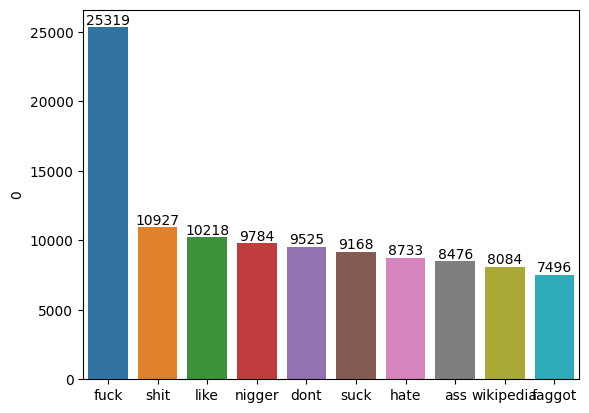

In [23]:
ax=sns.barplot(x=lst1.iloc[0:10,0].index,y=lst1.iloc[0:10,0])
ax.bar_label(ax.containers[0])

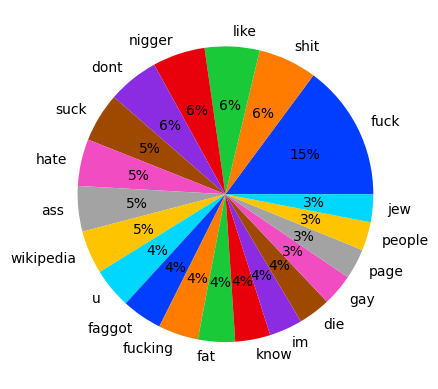

In [129]:
import matplotlib.pyplot as plt 

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(lst1.iloc[0:20,0], labels=lst1.iloc[0:20,0].index, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

### Wordcloud

In [24]:
from wordcloud import WordCloud

In [25]:
from PIL import Image
mask = np.array(Image.open("toxic_png1-removebg-preview.jpg"))

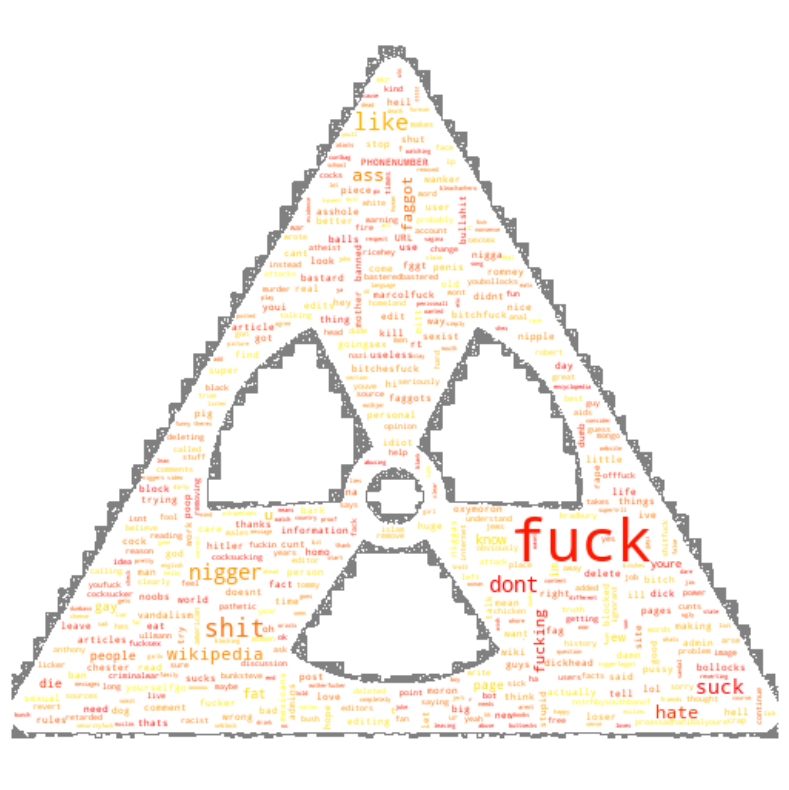

In [227]:
wc = WordCloud(background_color='white', max_words=2000 , collocations=False, relative_scaling =1,random_state=1, 
 mask = mask, width=200, height=100, contour_width=1, contour_color='grey', colormap='autumn').generate_from_frequencies(bow)
plt.figure(figsize = [15,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [47]:
#write the clean ds to file
df.to_csv("ff_clean.csv")

## Preparing the dataset for analysis

In [48]:
#word count only
from sklearn.feature_extraction.text import CountVectorizer
#word count and importance(freq) in corpus
from sklearn.feature_extraction.text import TfidfVectorizer
#Consider using GLOVE
from nltk.tokenize import RegexpTokenizer

In [53]:
Xfeatures = df[['txt_clean', 'cnt', 'aggression_attack', 'kaggle', 'toxicity',
       'twitter', 'twitter_racism', 'twitter_sexism', 'youtube',
       'train_kaggle2']]
ylabel = df['label']

In [54]:
#add maxFeature and ngram range to vectorizer? May set vocabulary to toxic comments if data size remains a problem

tfidf_vec = TfidfVectorizer(min_df=3, vocabulary=set(bow))
X = tfidf_vec.fit_transform(Xfeatures['txt_clean'])

In [55]:
#X is a sparse matrix
X.shape

(378661, 59808)

In [46]:
tfidf_vec.get_feature_names()

C:\Users\sofnl\anaconda3\envs\r4-base\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['a',
 'aa',
 'aaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaany',
 'aaaaaaaaaaaaaaasr',
 'aaaaaaaaaaaaaand',
 'aaaaaaaaaah',
 'aaaaah',
 'aaaaai',
 'aaaaaups',
 'aaaannnnyyyywwwwhhhheee',
 'aaaaso',
 'aaaaw',
 'aaaawwww',
 'aaand',
 'aaannn',
 'aaarrrgggh',
 'aac',
 'aachi',
 'aadam',
 'aademia',
 'aadhe',
 'aag',
 'aah',
 'aahhhh',
 'aakar',
 'aake',
 'aalawofficial',
 'aaliyah',
 'aaliyahs',
 'aalwuhaib',
 'aamattyhealy',
 'aamessinger',
 'aamir',
 'aan',
 'aand',
 'aandapples',
 'aap',
 'aapl',
 'aapropriate',
 'aaq',
 'aarcayne',
 'aardvark',
 'aargh',
 'aaron',
 'aaronchiyou',
 'aaronobviously',
 'aaronstein',
 'aarp',
 'aarpaged',
 'aas',
 'ab',
 'abacination',
 'abacus',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abansando',
 'abante',
 'abb',
 'abbas',
 'abbebarca',
 'abbey',
 'abbi',
 'abbreviated',
 'abbreviation',
 'abbs',
 'abbswinston',
 'abbusively',
 'abby',
 'abc',
 'abcde',
 'abcmonster',
 'abcxyz',
 'abd',
 'abdicate',
 

In [57]:
# Convert to DF
df_vec = pd.DataFrame(X.todense(),columns=tfidf_vec.get_feature_names())

MemoryError: Unable to allocate 169. GiB for an array with shape (378661, 59808) and data type float64

In [45]:
#couldn't convert to dense due to the memory allocation exceptions. 
#will do undersampling to balance dataset and contract the size of vocabulary and df

In [58]:
from sklearn.model_selection import train_test_split

In [52]:
#train, test = train_test_split(text_ff, test_size=0.30, random_state=4, shuffle=False)

In [59]:
x_train,x_test,y_train,y_test = train_test_split(X,ylabel,test_size=0.3,random_state=42)

In [60]:
y_train.value_counts()

0.0    235175
1.0     29887
Name: label, dtype: int64

In [61]:
y_train=y_train.astype(int)
y_test = y_test.astype(int)

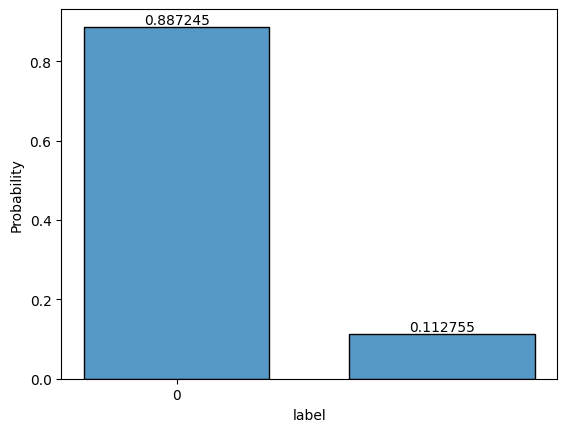

In [62]:
ax=sns.histplot(y_train, discrete=True, shrink=0.7, stat='probability')
for i in ax.containers:
    ax.bar_label(i,)
    
ax.set_xticks(range(0,1), labels=range(0, 1))

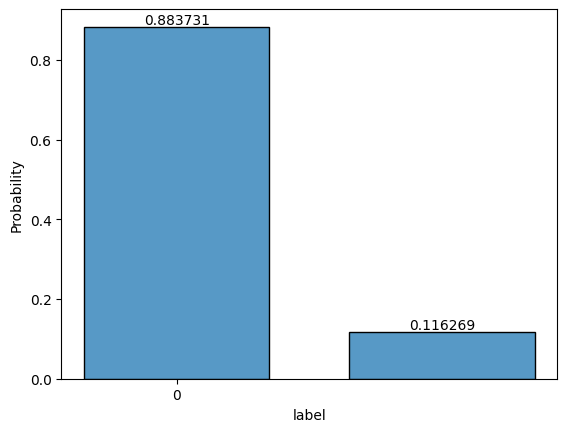

In [63]:
ax=sns.histplot(y_test, discrete=True, shrink=0.7, stat='probability')
for i in ax.containers:
    ax.bar_label(i,)
    
ax.set_xticks(range(0,1), labels=range(0, 1))

In [ ]:
#balancing with undersampling using tomek links

In [85]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(x_train, y_train)

y_resampled.value_counts()

0    234594
1     29887
Name: label, dtype: int64

In [64]:
from imblearn.under_sampling import RandomUnderSampler
#ClusterCentroids

rus = RandomUnderSampler(random_state=888)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

y_resampled.value_counts()

0    29887
1    29887
Name: label, dtype: int64

In [67]:
X_test_resampled, y_test_resampled = rus.fit_resample(x_test, y_test)

y_test_resampled.value_counts()

0    13208
1    13208
Name: label, dtype: int64

In [66]:
# Convert to DF
df_vec = pd.DataFrame(X_resampled.todense(),columns=tfidf_vec.get_feature_names())

C:\Users\sofnl\anaconda3\envs\r4-base\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [71]:
X_test_resampled.shape

(26416, 59808)

In [70]:
df_test_vec = pd.DataFrame(X_test_resampled.todense(),columns=tfidf_vec.get_feature_names())

MemoryError: Unable to allocate 11.8 GiB for an array with shape (26416, 59808) and data type float64

In [68]:
df_vec

,a,aa,aaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaany,aaaaaaaaaaaaaaasr,aaaaaaaaaaaaaand,aaaaaaaaaah,aaaaah,aaaaai,aaaaaups,...,−tabtab,√,√αʑʑρεɾ,√∞,∞,∞i,∫,≈§,⊕,⋅
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
